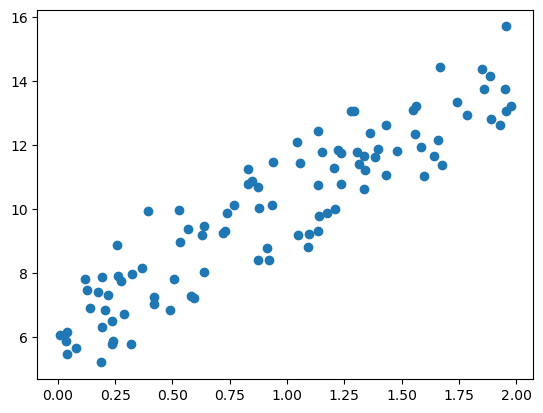

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X+6 식을 근사(w1=4, w0 = 6), random 값은 Noise를 위해 만듬
X = 2 * np.random.rand(100,1)
y = 6+4 * X + np.random.randn(100,1) # 절편이 6, 가중치가 4라는 것을 알 수 있음

plt.scatter(X,y)

In [10]:
X.shape, y.shape

((100, 1), (100, 1))

In [44]:
# learning _Rate => 보폭
# 오류 값 합이 최소가 도리 수 있는 최적의 회귀 계수를 찾는다는 것 -> 잔차 찾기
# 경사하강법을 적용하려면 넘파이 행렬에 w를 업데이트 해야함
def get_weight_updates(w1, w0, X, y, learning_rate = 0.01):
    N = len(y)

    # 먼저 w1_update w0_update 각각 w1 w0 의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y-y_pred # 실제 정답과 예측값의 차를 구함
    #w0_update 를 dot을 행렬 연산으로 수하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N,1))

    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

    return w1_update, w0_update

In [46]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1, w0를 업데이트 적용함
# 경사하강법을 적용해야함
def gradient_descent_steps(X, y, iters=10000):
    # w0 w1 를 모두 0으로 초기화
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates 호출하여 w1w0 업데이트 수행
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X,y, learning_rate = 0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update       
    return w1, w0

In [48]:
def get_cost(y,y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred))/N # MSE 평균제곱오차
    return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Graident Descent Total Cost :{0:.4f}'.format(get_cost(y, y_pred)))

# 1000번동안 최적을 찾는 반복함

w1:4.022 w0:6.162
Graident Descent Total Cost :0.9935


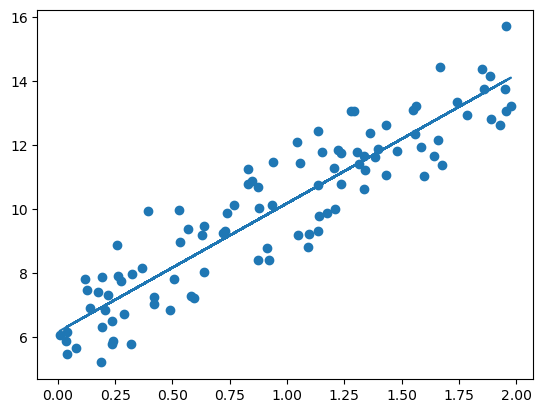

In [50]:
plt.scatter(X,y)
plt.plot(X,y_pred)

 - 보스턴 데이터셋 삭제

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
%matplotlib inline

bostonDF = pd.read_csv('c:/py_data/boston.csv')
del bostonDF['Unnamed: 0']
print('Boston 데이타셋 크기 :' ,bostonDF.shape)

bostonDF.head()

Boston 데이타셋 크기 : (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [60]:
#RM 거주할 수 있는 방의 갯순데 6.5개?

In [64]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


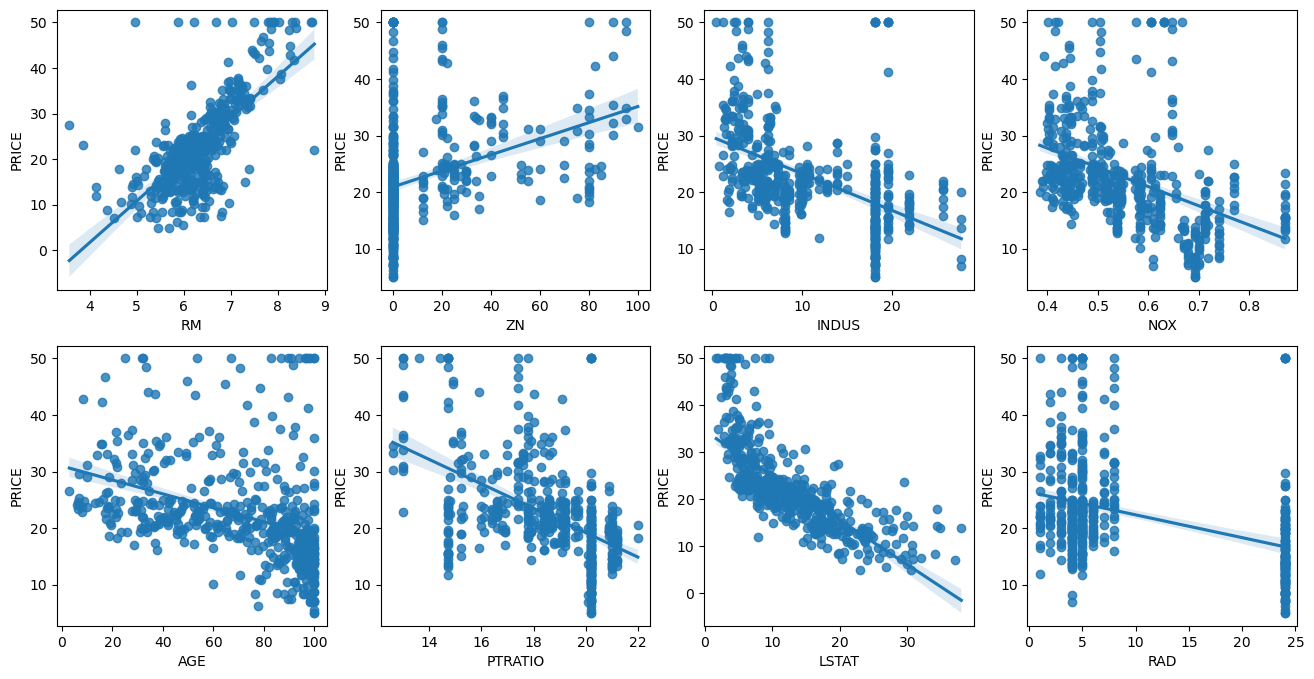

In [66]:
fig, axs = plt.subplots(figsize = (16,8), ncols=4, nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4

    sns.regplot(x=feature, y='PRICE', data=bostonDF , ax = axs[row][col])

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis = 1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
print('MSE : {0:.3f}, RMSE :{1:.3f}' .format (mse,rmse))
print('Vaiance score:{0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297, RMSE :4.159
Vaiance score:0.757


In [88]:
print('절편 값:',lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_,1))

절편 값: 40.99559517216436
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [90]:
coeff = pd.Series(data=np.round(lr.coef_,1), index = X_data.columns)
coeff.sort_values(ascending = False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [94]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis = 1, inplace = False)
lr = LinearRegression()

neg_mse_scores = cross_val_score(lr, X_data, y_target,
                                 scoring = 'neg_mean_squared_error', cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds 의 개별 Negative MSE scores: ' ,np.round(neg_mse_scores, 2))
print('5 folds 의 개별 RMSE scores: ', np.round(rmse_scores, 2))
print('5 folds 의 평균 RMSE : {0:.3f} ' .format(avg_rmse)) 

5 folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds 의 개별 RMSE scores:  [3.53 5.1  5.75 8.99 5.77]
5 folds 의 평균 RMSE : 5.829 


In [102]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n',X)

poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 feature:\n', poly_ftr)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 feature:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [116]:
def Polynomial_func(X):
    y = 1 + 2 * X[:,0] + 3*X[:,0] **2 + 4*X[:,1] ** 3
    return y

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n',X)
y =  Polynomial_func(X)
print('삼차 다항식 결정값: \n',y)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [  5 125]


In [118]:
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature:\n',poly_ftr)

model = LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수\n' , np.round(model.coef_, 2))
print('Polynomial 회귀 shape :', model.coef_.shape)

3차 다항식 계수 feature:
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 shape : (10,)


In [122]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline # 여러가지의 행동을 일괄적으로 처리 시키는 것
import numpy as np

def polynomial_func(X):
    y = 1 + 2 * X[:,0] + 3*X[:,0] **2 + 4*X[:,1] ** 3
    return y

model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear',LinearRegression())])

X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X,y)
print('polynomial 회귀 계수 \n' , np.round(model.named_steps['linear'].coef_,2))

polynomial 회귀 계수 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


### 다항회귀를 이용한 과소적합 및 과적합 이해

In [131]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

y = true_fun(X) + np.random.randn(n_samples) * 0.1

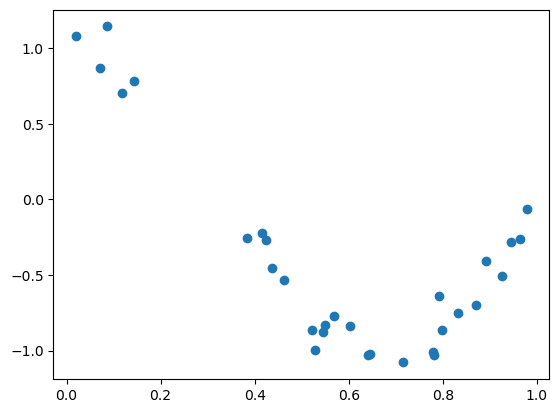

In [133]:
plt.scatter(X,y)


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE는 0.40772896250986845 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE는 0.0432087498723184 입니다.

Degree 15 회귀 계수는 [-2.98294000e+03  1.03899850e+05 -1.87416981e+06  2.03717199e+07
 -1.44874017e+08  7.09319141e+08 -2.47067173e+09  6.24564702e+09
 -1.15677216e+10  1.56895933e+10 -1.54007040e+10  1.06457993e+10
 -4.91381016e+09  1.35920643e+09 -1.70382078e+08] 입니다.
Degree 15 MSE는 182581084.8263125 입니다.


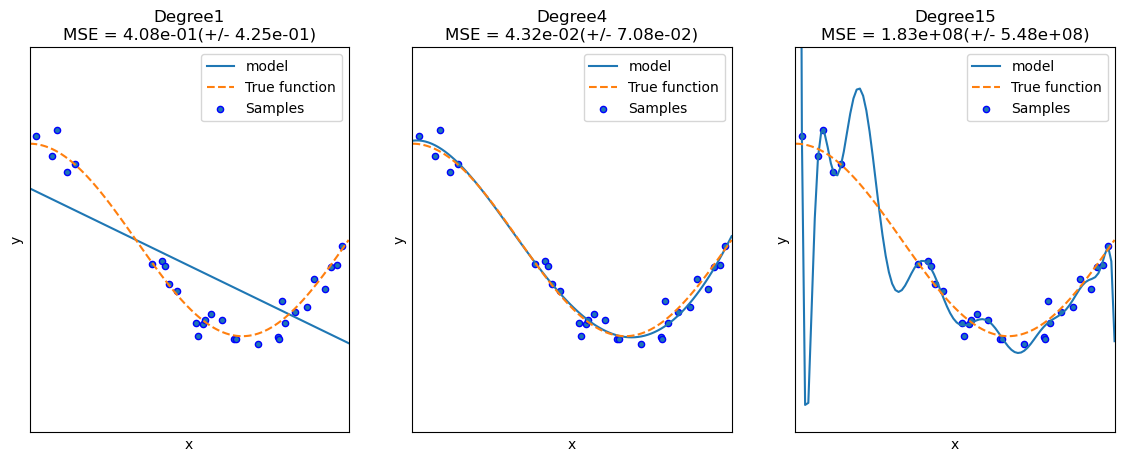

In [187]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

plt.figure(figsize=(14,5))
degrees = [1,4,15]

for i in range(len(degrees)):
    ax = plt.subplot(1 , len(degrees), i+1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                        ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)

    scores = cross_val_score(pipeline, X.reshape(-1, 1), y, scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients,2)))
    print('Degree {0} MSE는 {1} 입니다.'.format(degrees[i], -1*np.mean(scores)))

    X_test = np.linspace(0, 1, 100)

    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label = "model")

    plt.plot(X_test, true_fun(X_test), '--', label = "True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")

    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2,2)); plt.legend(loc="best")
    plt.title("Degree{}\nMSE = {:.2e}(+/- {:.2e})". format(degrees[i], -scores.mean(), scores.std()))

plt.show()

## 6 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷

In [209]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring = "neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds의 개별 Negative MES scores: ' , np.round(neg_mse_scores, 3))
print('5 folds의 개별 RMSE scores: ' , np.round(rmse_scores, 3))
print('5 folds의 개별 RMSE:{0:.3f} ' . format(avg_rmse))


5 folds의 개별 Negative MES scores:  [-11.422 -24.294 -28.144 -74.599 -28.517]
5 folds의 개별 RMSE scores:  [3.38  4.929 5.305 8.637 5.34 ]
5 folds의 개별 RMSE:5.518 


In [211]:
# ridge에 사용될 alpha 파라미터의 값들을 정의

alphas = [0, 0.1, 1, 10,100]

for alpha in alphas :
    ridge = Ridge(alpha = alpha)

    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring = "neg_mean_squared_error", cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5folds의 평균 RMSE : {1:.3f} ' .format(alpha,avg_rmse))

alpha 0 일 때 5folds의 평균 RMSE : 5.829 
alpha 0.1 일 때 5folds의 평균 RMSE : 5.788 
alpha 1 일 때 5folds의 평균 RMSE : 5.653 
alpha 10 일 때 5folds의 평균 RMSE : 5.518 
alpha 100 일 때 5folds의 평균 RMSE : 5.330 


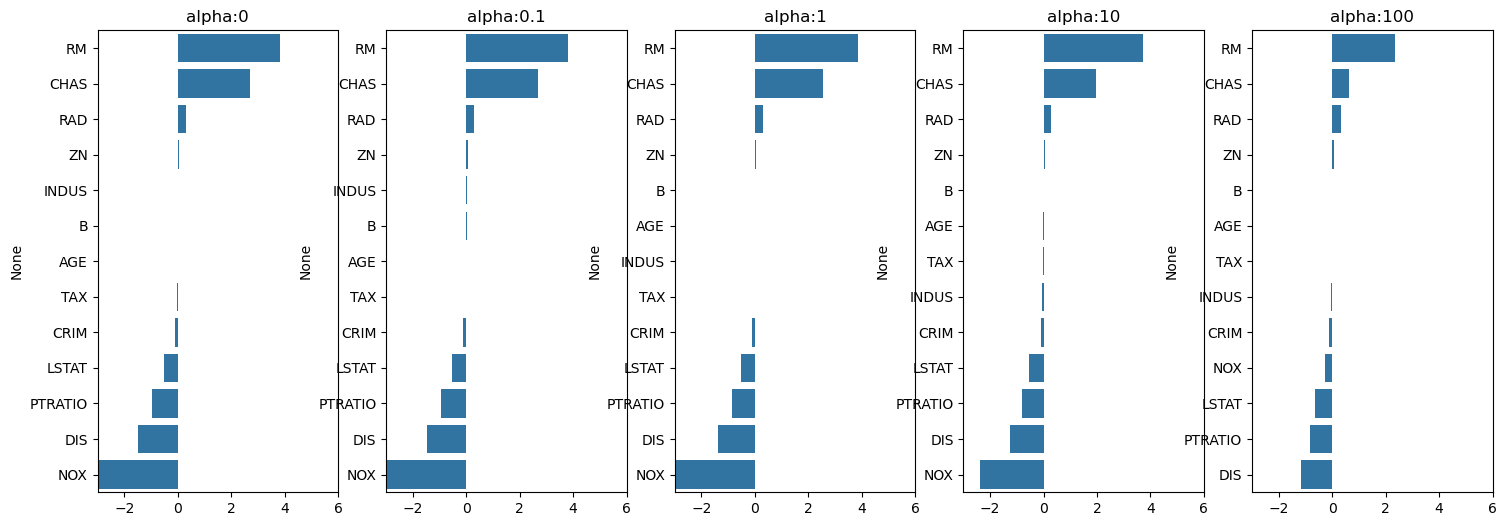

In [213]:
fig, axs = plt.subplots(figsize =(18,6) , nrows=1, ncols=5)

coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas) :
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_data, y_target)

    coeff = pd.Series(data=ridge.coef_ , index = X_data.columns )
    colname = 'alpha:' +str(alpha)
    coeff_df[colname] = coeff

    coeff = coeff.sort_values(ascending = False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coeff.values , y=coeff.index, ax = axs[pos])

plt.show()

In [231]:
ridge_alphas = [ 0, 0.1, 1 ,10 ,100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending =False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


In [216]:
# 회귀계수가 줄어드는 것을 알 수 있다 , 알파값이 커지면서

In [218]:
# 필요없는 컬럼이 많을 경우에는 라쏘를 쓰는게 좋다

In [225]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

lasso = Lasso(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring = "neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds의 개별 Negative MES scores: ' , np.round(neg_mse_scores, 3))
print('5 folds의 개별 RMSE scores: ' , np.round(rmse_scores, 3))
print('5 folds의 개별 RMSE:{0:.3f} ' . format(avg_rmse))


5 folds의 개별 Negative MES scores:  [-12.825 -27.279 -34.68  -52.694 -22.051]
5 folds의 개별 RMSE scores:  [3.581 5.223 5.889 7.259 4.696]
5 folds의 개별 RMSE:5.330 


In [220]:
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('Lasso', params=Lasso_alphas, X_data_n=X_data, y_target_n=y_target)

NameError: name 'get_linear_reg_eval' is not defined

# 엘라스틱넷 회귀

In [205]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score

elasticNet = ElasticNet(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring = "neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds의 개별 Negative MES scores: ' , np.round(neg_mse_scores, 3))
print('5 folds의 개별 RMSE scores: ' , np.round(rmse_scores, 3))
print('5 folds의 개별 RMSE:{0:.3f} ' . format(avg_rmse))


5 folds의 개별 Negative MES scores:  [-12.825 -27.279 -34.68  -52.694 -22.051]
5 folds의 개별 RMSE scores:  [3.581 5.223 5.889 7.259 4.696]
5 folds의 개별 RMSE:5.330 


In [198]:
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]

coeff_elastic_df = get_linear_reg_eval('ElasticNEt', params=elastic_alphas,
                                       X_data_n=X_data, y_target_n=y_target)

NameError: name 'get_linear_reg_eval' is not defined

# 선형 회귀 모델을 위한 데이터 변환

- 선형 회귀 모델은 타겟 값의 분포가 가우시안 정규분포 형태를 선호
- - 일반적으로 선형회귀를 사용할 경우 학습 전

In [235]:
# standard scaler 하면 0 1 사이로 작아지고 y의 값이 평균이 0이고 표준편차가 1인 데이터로 y를 바꿔주고
# maxminscaler클래스를 이용해 최소값이 0이고 최대값이 1인 값으로 정규화

In [264]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures


def get_scaled_data(method='None', p_degree=None, input_data = None):
    if method =='Standard' :
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data) 
    else:
        scaled_data = input_data

    if p_degree !=None:
        scaled_data = PolynomialFeatures(degree = p_degree,
                                         include_bias =False).fit_transform(scaled_data)
    return scaled_data

In [266]:
from sklearn.linear_model import Ridge

ridge_alphas = [0.1, 1 ,10 ,100]


scale_methods = [(None, None), ('Standard', None), ('Standard', 2), ('MinMax', None), ('MinMax', 2),('Log', None)]
for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method
                                    [1], input_data = X_data)
    print(X_data_scaled.shape, X_data.shape)
    print('\n## 변환 유형: {0}, Polynomial degree :{1}'.format(scale_method[0], scale_method[1]))
    for alpha in alphas :
        ridge = Ridge(alpha = alpha)
    # cross_val_score 를 이용하여 5folds 의 평균 RMSE 계산
        neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring = "neg_mean_squared_error", cv=5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0} 일 때 5folds의 평균 RMSE : {1:.3f} ' .format(alpha,avg_rmse))

(506, 13) (506, 13)

## 변환 유형: None, Polynomial degree :None
alpha 0 일 때 5folds의 평균 RMSE : 5.829 
alpha 0.1 일 때 5folds의 평균 RMSE : 5.788 
alpha 1 일 때 5folds의 평균 RMSE : 5.653 
alpha 10 일 때 5folds의 평균 RMSE : 5.518 
alpha 100 일 때 5folds의 평균 RMSE : 5.330 
(506, 13) (506, 13)

## 변환 유형: Standard, Polynomial degree :None
alpha 0 일 때 5folds의 평균 RMSE : 5.829 
alpha 0.1 일 때 5folds의 평균 RMSE : 5.788 
alpha 1 일 때 5folds의 평균 RMSE : 5.653 
alpha 10 일 때 5folds의 평균 RMSE : 5.518 
alpha 100 일 때 5folds의 평균 RMSE : 5.330 
(506, 104) (506, 13)

## 변환 유형: Standard, Polynomial degree :2
alpha 0 일 때 5folds의 평균 RMSE : 5.829 
alpha 0.1 일 때 5folds의 평균 RMSE : 5.788 
alpha 1 일 때 5folds의 평균 RMSE : 5.653 
alpha 10 일 때 5folds의 평균 RMSE : 5.518 
alpha 100 일 때 5folds의 평균 RMSE : 5.330 
(506, 13) (506, 13)

## 변환 유형: MinMax, Polynomial degree :None
alpha 0 일 때 5folds의 평균 RMSE : 5.829 
alpha 0.1 일 때 5folds의 평균 RMSE : 5.788 
alpha 1 일 때 5folds의 평균 RMSE : 5.653 
alpha 10 일 때 5folds의 평균 RMSE : 5.518 
alpha 100 일 때 5folds의 평균 RM

# 7 로지스틱 회귀
- 시그모이드 함수

In [280]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

In [286]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)
X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size = 0.3, random_state=0)

In [288]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
lr_preds = lr_clf.predict(X_test)


In [290]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
def get_clf_eval(y_test , pred): # 여기는 우리가 만든거
    confusion = confusion_matrix(y_test , pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)

    f1 = f1_score(y_test , pred)
    roc_auc=roc_auc_score(y_test,lr_preds)
    
    print ('오차 행렬')
    print(confusion)
    print('정확도 : {0: 4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, F1:{3:.4f}, ROC_AUC 값 :{4:.4f}'.\
          format(accuracy,precision, recall, f1))

thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

pred_proba = lr_clf.predict_proba(X_test)

get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1,1), thresholds)

NameError: name 'get_eval_by_threshold' is not defined

In [ ]:
get_clf_eval(y_test, 
            

In [292]:
from sklearn.model_selection import GridSearchCV

params={'penalty':['l2'],
        'C':[0.01, 0.1, 1, 1.5, 10]}

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3)
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터:{0}'.format(grid_clf.best_params_))

최적 하이퍼 파라밑너:{'C': 1, 'penalty': 'l2'}


In [ ]:
def get_model_cv_prediction(model, X_data, y_target):
    